In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras 

plt.rcParams['figure.dpi'] = 180
plt.rcParams['axes.grid'] = False


# 加载数据
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


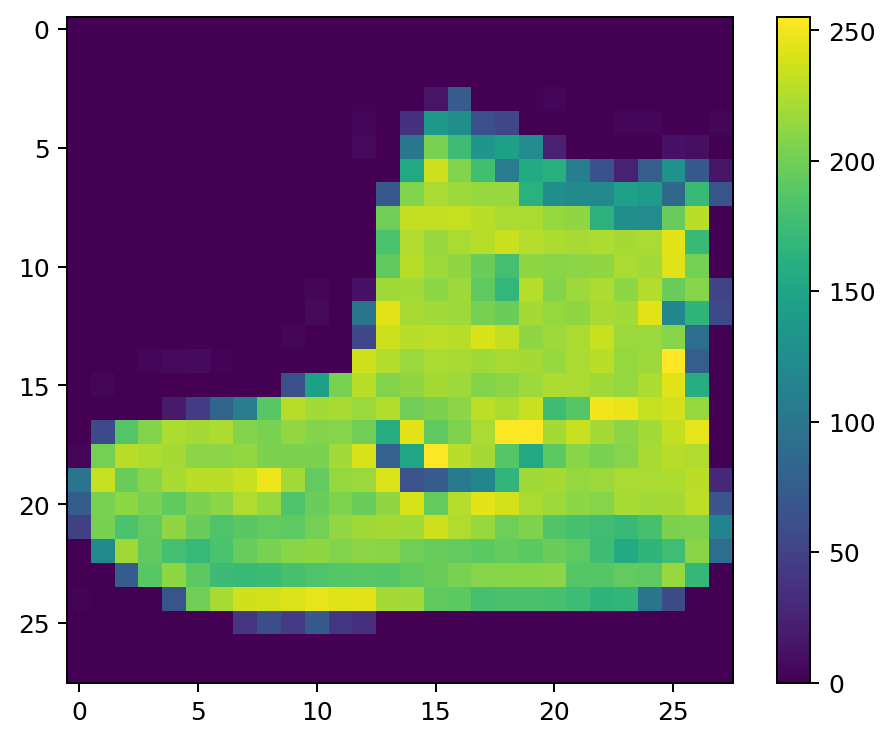

In [2]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [4]:
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

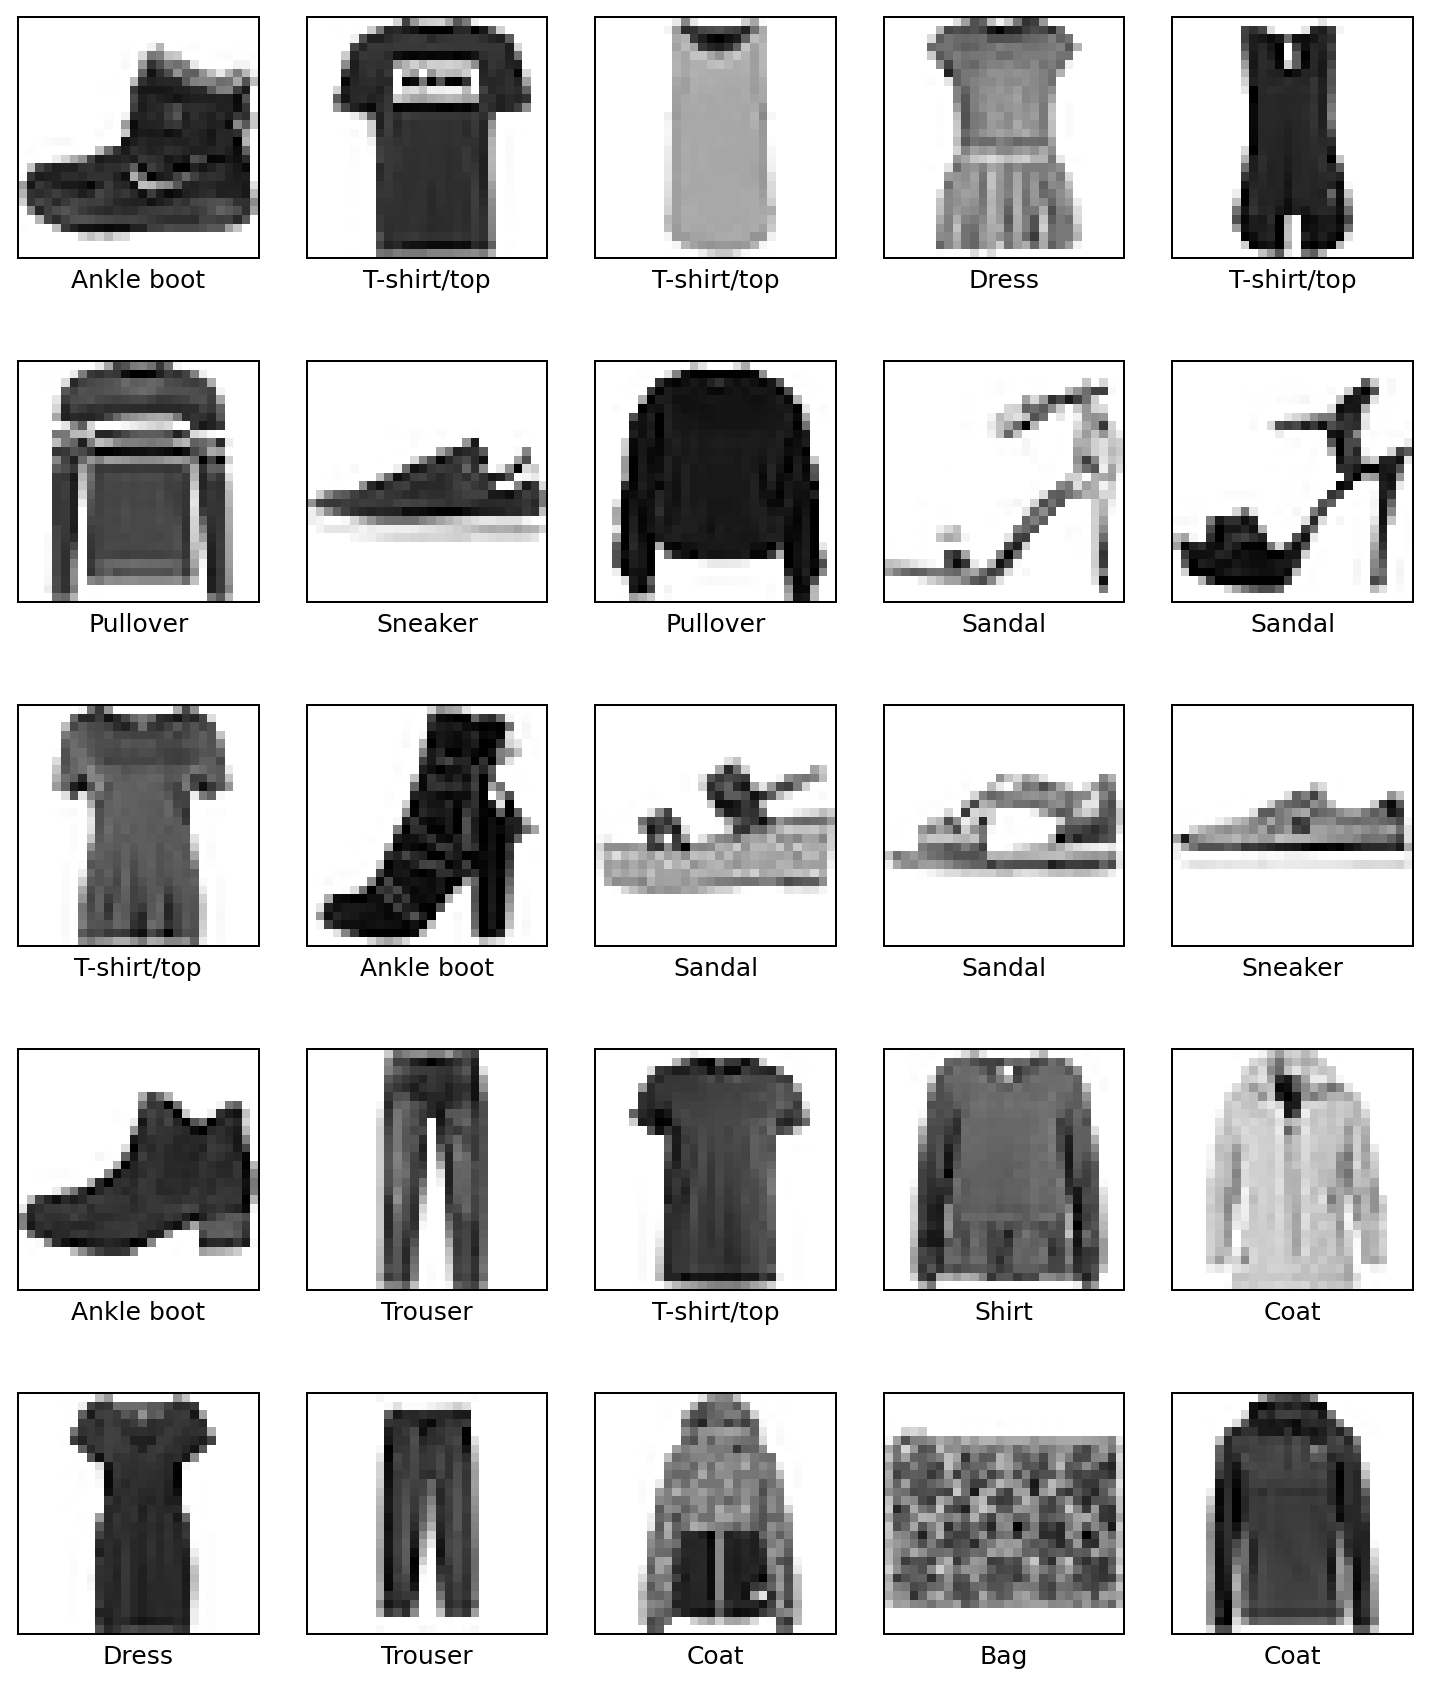

In [5]:
plt.figure(figsize = (10, 12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)   # imshow函数来显示一个数字图像，使用cm子库中的binary颜色映射，导致图像被染成黑白两色。
    plt.xlabel(class_names[train_labels[i]])
    plt.xticks([])
    plt.yticks([])

plt.show()

In [7]:
# 全连接神经网络
L = keras.layers

model = keras.Sequential(
    [
        L.Flatten(input_shape=(28, 28),),
        L.Dense(128, activation=tf.nn.relu),
        L.Dense(10, activation=tf.nn.softmax)
    ]
)

In [8]:
model.compile(optimizer=tf.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',    # 这里使用稀疏分类交叉熵
             metrics=['accuracy'])


In [9]:
model.fit(train_images_norm,
         train_labels,
         epochs=5,    #  总共训练5轮
         validation_split=0.2)  # 使用20%数据作为验证数据


Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5187 - accuracy: 0.8190 - val_loss: 0.4238 - val_accuracy: 0.8494
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3895 - accuracy: 0.8601 - val_loss: 0.3787 - val_accuracy: 0.8632
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3482 - accuracy: 0.8717 - val_loss: 0.3769 - val_accuracy: 0.8618
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3231 - accuracy: 0.8807 - val_loss: 0.3597 - val_accuracy: 0.8713
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3026 - accuracy: 0.8885 - val_loss: 0.3533 - val_accuracy: 0.8717


In [12]:
test_loss, test_acc = model.evaluate(test_images_norm, test_labels)
print(f"Test accuracy:{test_acc}, Test loss:{test_loss}")

313/313 [==============================] - 0s 722us/step - loss: 0.3724 - accuracy: 0.8676
Test accuracy:0.8676000237464905, Test loss:0.37239769101142883


In [13]:
predictions = model.predict(test_images_norm)
print(predictions[0])

313/313 [==============================] - 0s 716us/step
[9.1948059e-05 5.4480662e-08 3.0001025e-05 3.4890792e-04 4.2179952e-05
 1.3983981e-01 2.5798735e-04 2.4034236e-01 6.0321083e-03 6.1301458e-01]


In [14]:
import numpy as np

np.argmax(predictions[0])  # 输出9

9

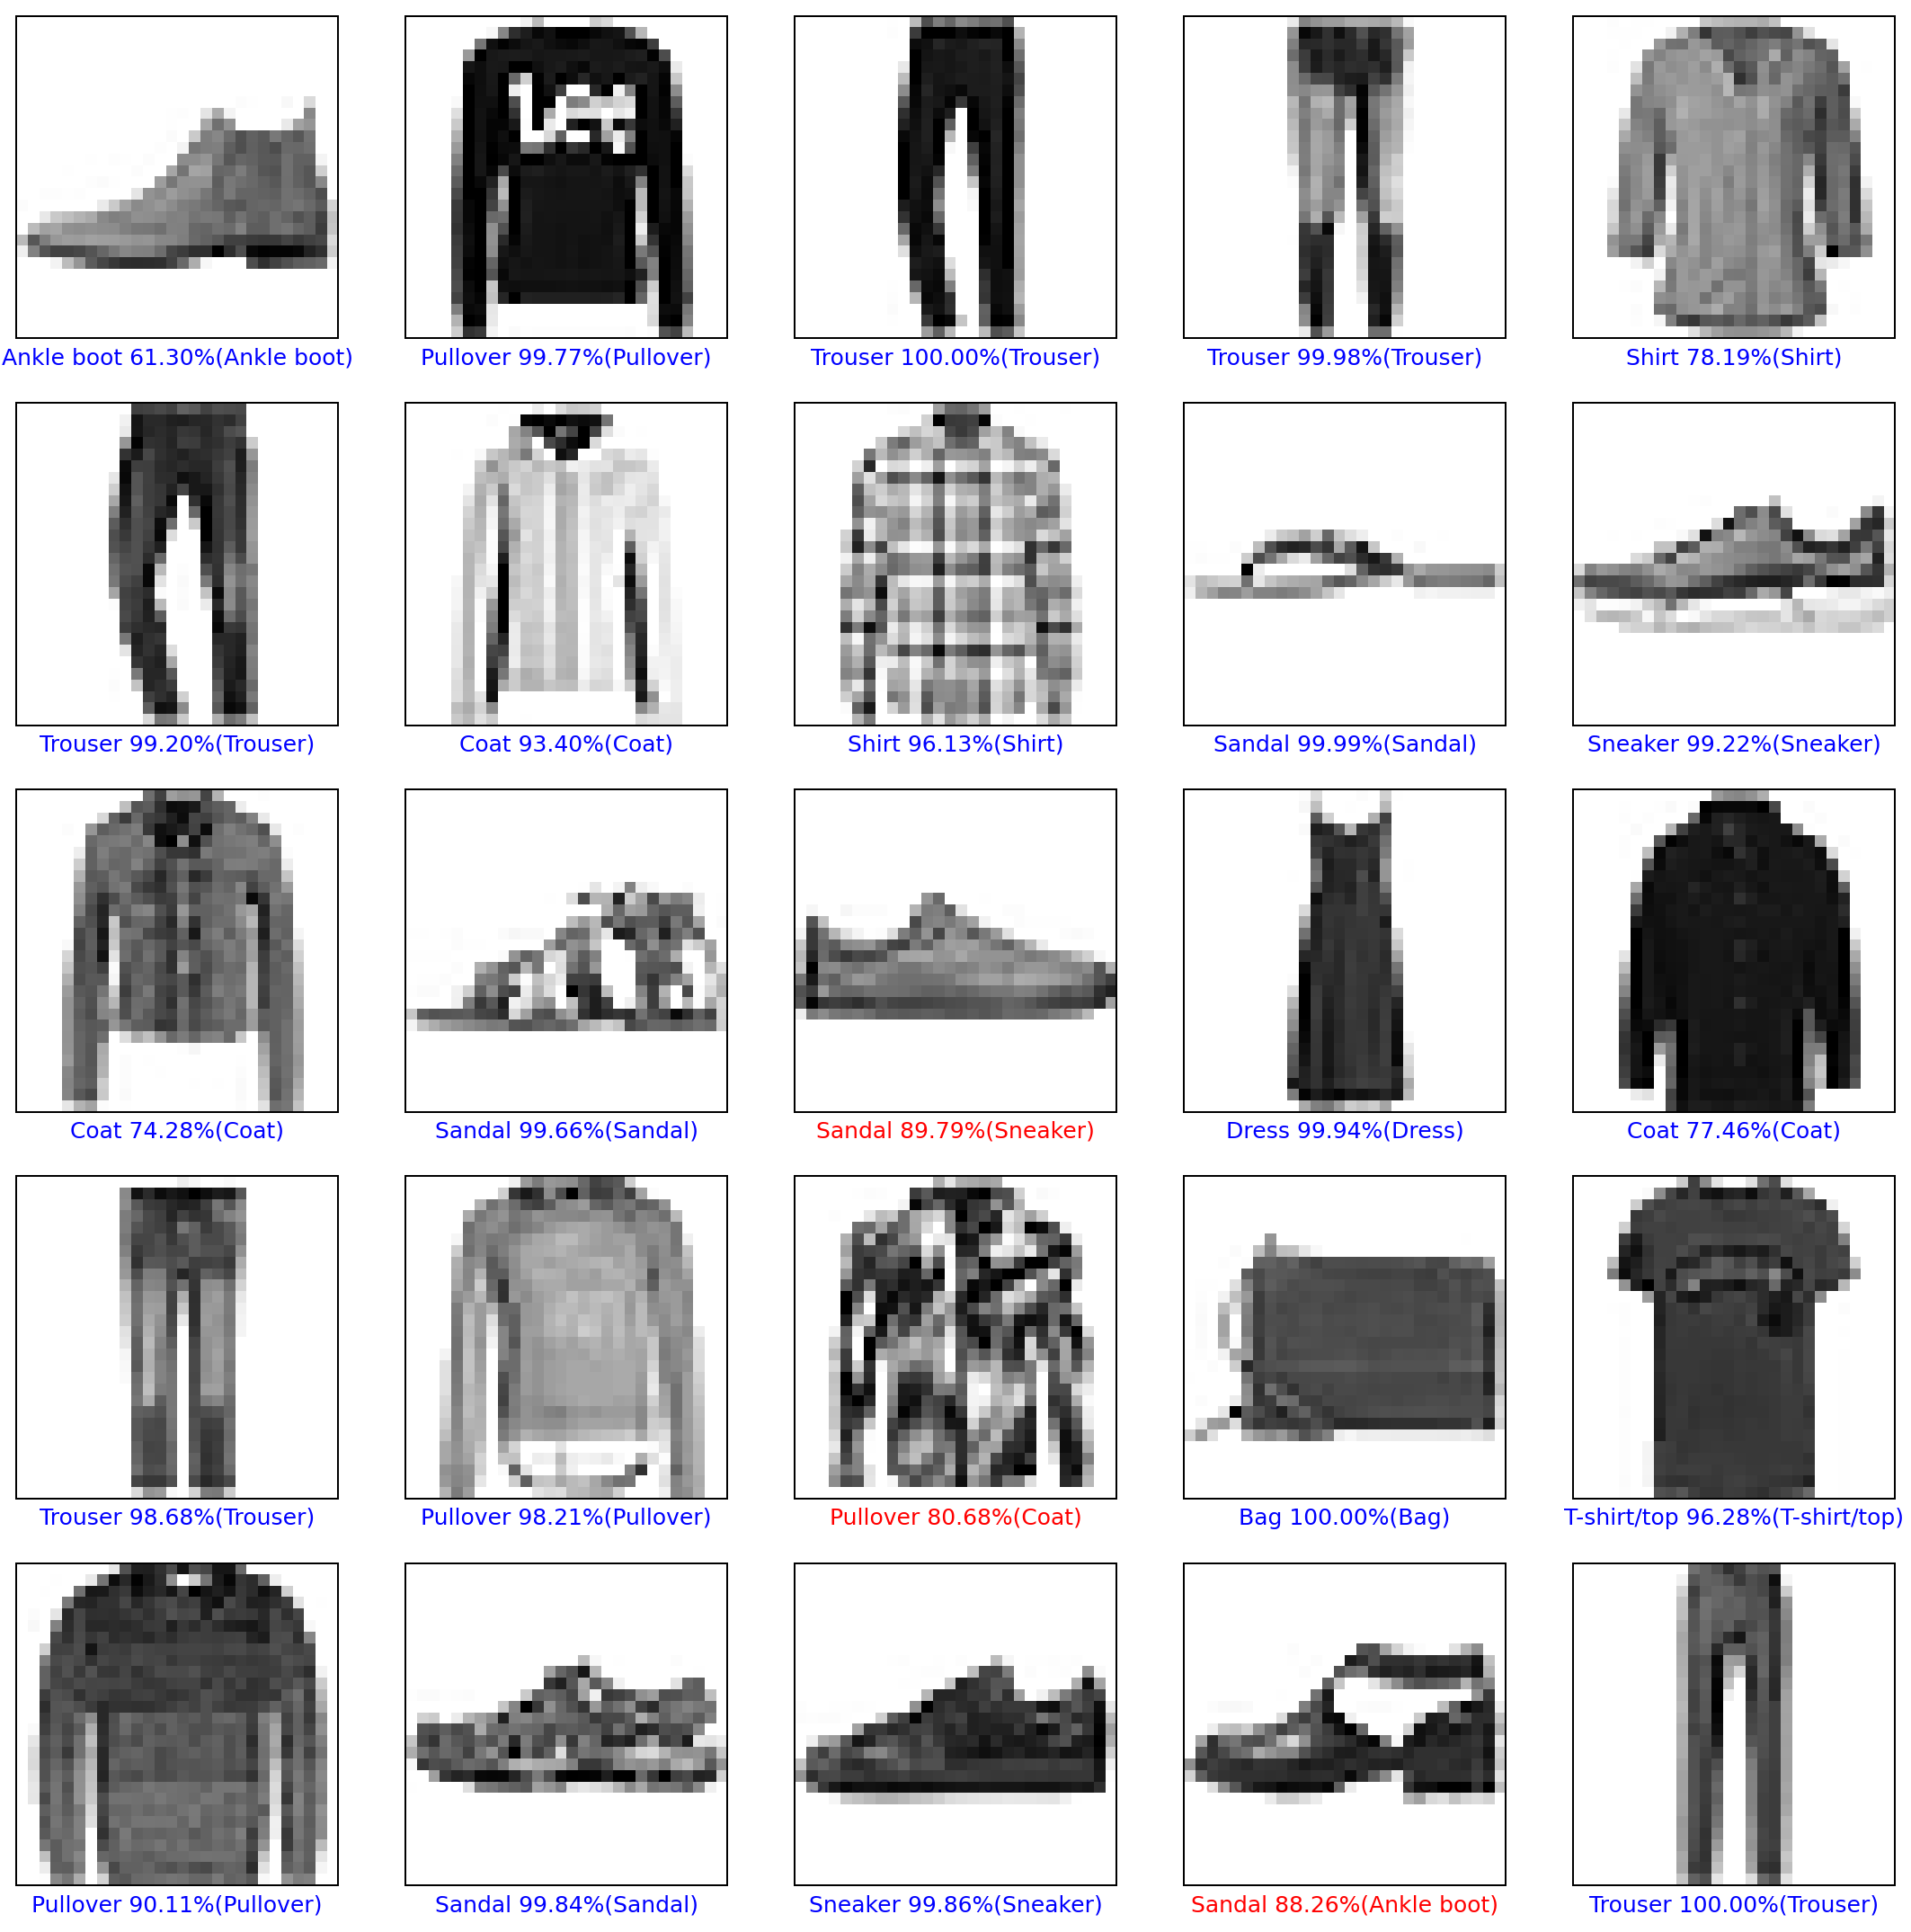

In [22]:
plt.figure(figsize=(15, 15))

for index in range(25):
    plt.subplot(5, 5, index + 1)
    plt.xticks([])
    plt.yticks([])
    
    image = test_images_norm[index]
    true_label = test_labels[index]
    predict_array = predictions[index]

    plt.imshow(image, cmap=plt.cm.binary)

    predict_label = np.argmax(predict_array)

    if  predict_label == true_label:
        color = 'blue'
    else:
        color = 'red'
 
    label = f'{class_names[predict_label]} {100*np.max(predict_array):2.2f}%({class_names[true_label]})'
    plt.xlabel(label, color=color)

plt.show()


In [31]:
#  卷积神经网络--模仿了局部感知和权重共享
# 进行卷积操作的是卷积层，可以通过一个激活函数把卷积操作的线性输出转化成非线性输出。
# 卷积层后面带有一个池化层，减少特征维度。
#  卷积网络的实现
conv_model = keras.Sequential([
    # 卷积层，包括32个3×3的卷积核，输出维度为[28-3+1， 28-3+1， 32]
    L.Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=3, strides=1),
    # 池化层
    L.MaxPool2D(pool_size=2, strides=2),
    # 卷积层
    L.Conv2D(filters=64, kernel_size=3, strides=1),
    # 池化层
    L.MaxPool2D(pool_size=2, strides=2),
    L.Flatten(),
    L.Dense(256, activation=tf.nn.relu),
    L.Dense(10, activation=tf.nn.softmax)
])

conv_model.compile(optimizer=tf.optimizers.Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


conv_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dense_9 (Dense)             (None, 256)              

In [32]:
# 由于conv_2D需要3个维度的张量输入
#  因此把数据从[28, 28]转换成[28,28,1]（最后一维是色彩通道）

train_images_reshape = train_images_norm.reshape([-1, 28, 28, 1])
test_images_reshape = test_images_norm.reshape([-1, 28, 28, 1])


conv_model.fit(train_images_reshape,
              train_labels,
              epochs=5,
              validation_split=0.2)  # 使用20%数据作为验证数据

test_loss, test_acc = conv_model.evaluate(test_images_reshape, test_labels)
print(f'Conv model test accuracy:{test_acc}')

Epoch 1/5
1500/1500 [==============================] - 18s 11ms/step - loss: 0.4447 - accuracy: 0.8390 - val_loss: 0.3512 - val_accuracy: 0.8718
Epoch 2/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2955 - accuracy: 0.8921 - val_loss: 0.2969 - val_accuracy: 0.8912
Epoch 3/5
1500/1500 [==============================] - 19s 12ms/step - loss: 0.2435 - accuracy: 0.9105 - val_loss: 0.2736 - val_accuracy: 0.9015
Epoch 4/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2006 - accuracy: 0.9258 - val_loss: 0.3041 - val_accuracy: 0.8919
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3018 - accuracy: 0.9025
Conv model test accuracy:0.9024999737739563
